# IMPORT LIBRARIES

In [54]:
import pandas as pd
import numpy as np
import datetime as dt
import re
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [55]:
data=pd.read_excel('../Data/data-co-lien.xlsx',index_col=1)
data = data.iloc[:, 1:]

In [56]:
data

,USD/VND,EUR/VND
Ngày,,
2022-12-22,23650.0,25180.15700
2022-12-23,23612.5,25052.86500
2022-12-26,23605.0,25075.59450
2022-12-27,23600.0,25163.50100
2022-12-28,23600.0,25163.50100
...,...,...
2023-12-18,24360.0,26599.90250
2023-12-19,24357.5,26654.41375
2023-12-20,24345.0,26684.55650


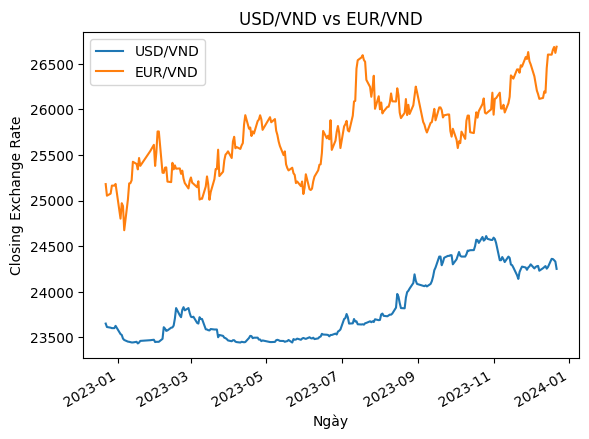

In [57]:
price = data
price.plot()
plt.title('USD/VND vs EUR/VND')
plt.ylabel('Closing Exchange Rate')
plt.show()


# Calculate the daily log returns and drop any NAs

Text(0, 0.5, 'Daily Log Returns')

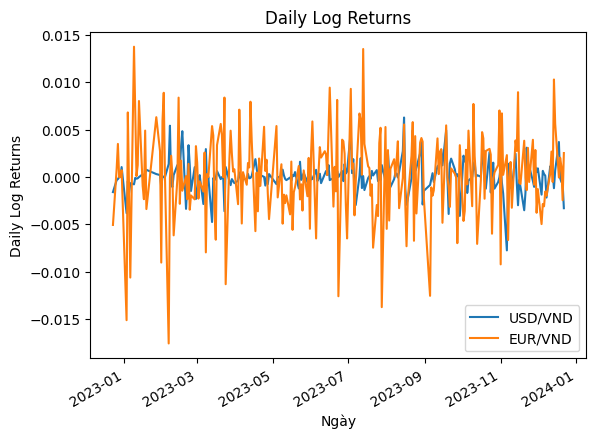

In [58]:
log_returns = price.pct_change().dropna()
log_returns.plot()
plt.title('Daily Log Returns')
plt.ylabel('Daily Log Returns')

In [73]:
log_returns=log_returns.round(5)
log_returns

,USD/VND,EUR/VND
Ngày,,
2022-12-23,-0.00159,-0.00506
2022-12-26,-0.00032,0.00091
2022-12-27,-0.00021,0.00351
2022-12-28,0.00000,0.00000
2022-12-29,0.00000,0.00000
...,...,...
2023-12-18,0.00371,-0.00005
2023-12-19,-0.00010,0.00205
2023-12-20,-0.00051,0.00113


In [60]:
(log_returns).describe()

,USD/VND,EUR/VND
count,250.000000,250.000000
mean,0.000102,0.000243
std,0.001643,0.004616
min,-0.007740,-0.017580
25%,-0.000517,-0.002330
50%,0.000000,0.000280
75%,0.000660,0.002925
max,0.006300,0.013780


# Create a weighted portfolio

In [61]:
quantities = [3000000, 2000000]
portfolio_value = [int(data.iloc[-1].iloc[0] * quantities[0]), int(data.iloc[-1].iloc[1] * quantities[1])]
portfolio_value

[72750000000, 53374256000]

In [62]:
total_portfolio_value = portfolio_value[0] + portfolio_value[1]
total_portfolio_value

126124256000

In [63]:
weights = [
    data.iloc[-1].iloc[0] * quantities[0] / total_portfolio_value,
    data.iloc[-1].iloc[1] * quantities[1] / total_portfolio_value
]
print(weights)

[0.5768121240691402, 0.4231878759308598]


# Calculate the historical portfolio returns

In [64]:
historical_returns = (log_returns*weights).sum(axis=1)
historical_returns = historical_returns.round(5)
print(historical_returns)

Ngày
2022-12-23   -0.00306
2022-12-26    0.00020
2022-12-27    0.00136
2022-12-28    0.00000
2022-12-29    0.00000
               ...   
2023-12-18    0.00212
2023-12-19    0.00081
2023-12-20    0.00018
2023-12-21   -0.00139
2023-12-22   -0.00082
Length: 250, dtype: float64


In [65]:
historical_returns_df = pd.DataFrame(historical_returns)
historical_returns_df

,0
Ngày,
2022-12-23,-0.00306
2022-12-26,0.00020
2022-12-27,0.00136
2022-12-28,0.00000
2022-12-29,0.00000
...,...
2023-12-18,0.00212
2023-12-19,0.00081
2023-12-20,0.00018


In [66]:
historical_returns_df.rename(columns={0:'Tổng Danh Mục'},inplace=True)
historical_returns_df

,Tổng Danh Mục
Ngày,
2022-12-23,-0.00306
2022-12-26,0.00020
2022-12-27,0.00136
2022-12-28,0.00000
2022-12-29,0.00000
...,...
2023-12-18,0.00212
2023-12-19,0.00081
2023-12-20,0.00018


# Summerize Log Returns

In [67]:
# Calculate Percentages
total_returns_percentage = log_returns.merge(historical_returns_df, how = 'inner', left_index = True, right_index = True)
total_returns_percentage

,USD/VND,EUR/VND,Tổng Danh Mục
Ngày,,,
2022-12-23,-0.00159,-0.00506,-0.00306
2022-12-26,-0.00032,0.00091,0.00020
2022-12-27,-0.00021,0.00351,0.00136
2022-12-28,0.00000,0.00000,0.00000
2022-12-29,0.00000,0.00000,0.00000
...,...,...,...
2023-12-18,0.00371,-0.00005,0.00212
2023-12-19,-0.00010,0.00205,0.00081
2023-12-20,-0.00051,0.00113,0.00018


In [68]:
row_multiplier = portfolio_value + [total_portfolio_value]
row_multiplier_df = pd.DataFrame([row_multiplier], columns=total_returns_percentage.columns)
row_multiplier_df

,USD/VND,EUR/VND,Tổng Danh Mục
0,72750000000,53374256000,126124256000


In [69]:
# Calculate Values 
total_returns_value = total_returns_percentage.copy()
total_returns_value = total_returns_percentage.mul(row_multiplier_df.values[0], axis=1)
total_returns_value

,USD/VND,EUR/VND,Tổng Danh Mục
Ngày,,,
2022-12-23,-115672500.0,-2.700737e+08,-3.859402e+08
2022-12-26,-23280000.0,4.857057e+07,2.522485e+07
2022-12-27,-15277500.0,1.873436e+08,1.715290e+08
2022-12-28,0.0,0.000000e+00,0.000000e+00
2022-12-29,0.0,0.000000e+00,0.000000e+00
...,...,...,...
2023-12-18,269902500.0,-2.668713e+06,2.673834e+08
2023-12-19,-7275000.0,1.094172e+08,1.021606e+08
2023-12-20,-37102500.0,6.031291e+07,2.270237e+07


# Find the X-day portfolio returns

In [70]:
days = 1

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Ngày
2022-12-23   -0.00306
2022-12-26    0.00020
2022-12-27    0.00136
2022-12-28    0.00000
2022-12-29    0.00000
               ...   
2023-12-18    0.00212
2023-12-19    0.00081
2023-12-20    0.00018
2023-12-21   -0.00139
2023-12-22   -0.00082
Length: 250, dtype: float64


# Select CI and calculate VaR

In [71]:
confidence_interval = 0.99
VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))* total_portfolio_value
print(f'Value at Risk at {confidence_interval:.0%} confidence level, {days} day(s) is {VaR}')

Value at Risk at 99% confidence level, 1 day(s) is 701831034.9375999


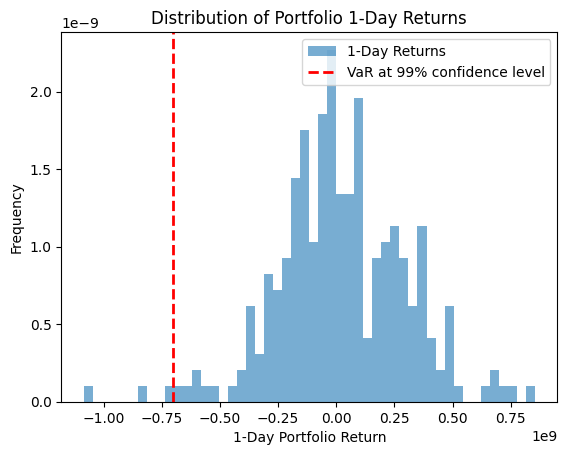

In [72]:
return_window=days
range_returns=historical_returns.rolling(window = return_window).sum()
range_returns=range_returns.dropna()

range_returns_value = range_returns * total_portfolio_value

plt.hist(range_returns_value.dropna(), bins=50, density=True, alpha=0.6, label=f'{days}-Day Returns')
plt.xlabel(f'{days}-Day Portfolio Return')  
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()